In [ ]:
!pip install jovian --upgrade --quiet
!pip install plotly==5.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as py
from plotly.offline import plot, iplot, init_notebook_mode
py.init_notebook_mode(connected=True)

In [ ]:
netflix_titles = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix_titles.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
netflix_titles.isnull().sum().sum()

4307

In [ ]:
netflix_titles.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'Null values in dataset')

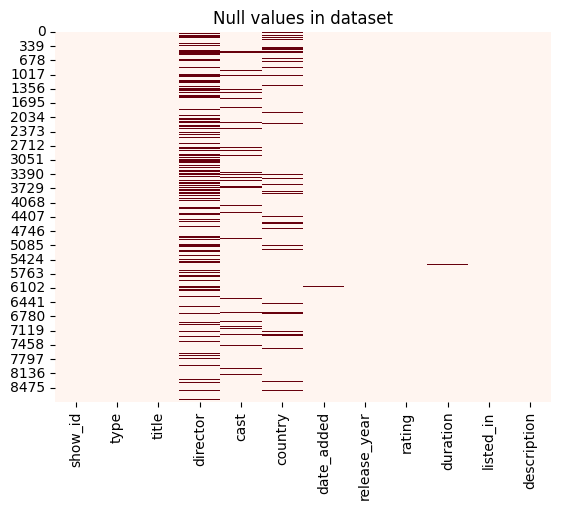

In [ ]:
sns.heatmap(netflix_titles.isnull(),cbar=False,cmap='Reds')
plt.title('Null values in dataset')

In [ ]:
netflix_titles['director'].fillna('No Director',inplace =True)
netflix_titles['cast'].fillna('No Cast', inplace=True)
netflix_titles['country'].fillna('Country Unavailable', inplace=True)
netflix_titles.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
netflix_titles.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration         True
listed_in       False
description     False
dtype: bool

In [ ]:
netflix_movies = netflix_titles[netflix_titles.type == 'Movie'].copy()

In [ ]:
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [ ]:
netflix_shows = netflix_titles[netflix_titles.type == 'TV Show'].copy()

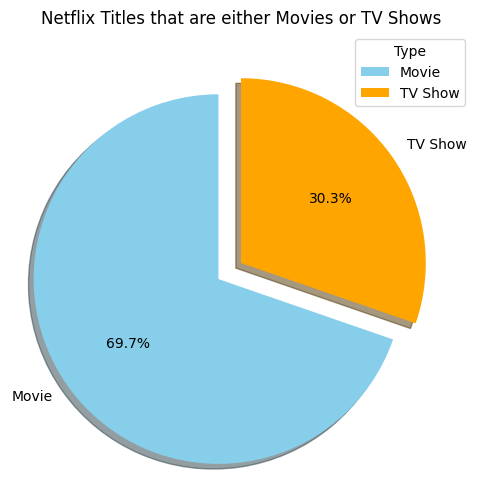

In [ ]:
plt.figure(figsize = (12,6))
plt.title("Netflix Titles that are either Movies or TV Shows")
plt.pie(netflix_titles.type.value_counts(),explode = (0.15,0),startangle = 90,shadow=True,autopct='%1.1f%%',labels = netflix_titles.type.value_counts().index,colors = ['skyblue','orange'])
plt.legend(title = 'Type')
plt.show()

In [ ]:
print(netflix_movies.shape[0],netflix_shows.shape[0])

6129 2664


In [ ]:
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix_titles['year_added'] = pd.DatetimeIndex(netflix_titles['date_added']).year
netflix_movies['year_added'] = pd.DatetimeIndex(netflix_movies['date_added']).year
netflix_shows['year_added'] = pd.DatetimeIndex(netflix_shows['date_added']).year
netflix_titles['month_added'] = pd.DatetimeIndex(netflix_titles['date_added']).month
netflix_movies['month_added'] = pd.DatetimeIndex(netflix_movies['date_added']).month
netflix_shows['month_added'] = pd.DatetimeIndex(netflix_shows['date_added']).month
netflix_titles['day_added'] = pd.DatetimeIndex(netflix_titles['date_added']).weekday
netflix_movies['day_added'] = pd.DatetimeIndex(netflix_movies['date_added']).weekday
netflix_shows['day_added'] = pd.DatetimeIndex(netflix_shows['date_added']).weekday

In [ ]:
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,5
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,4
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,4
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,4
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,4


In [ ]:
netflix_year = netflix_titles['year_added'].value_counts().to_frame().reset_index().rename(columns={'index':'year','year_added':'count'})
netflix_year = netflix_year.sort_values('year')

In [ ]:
netflix_year2 = netflix_titles[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'}).sort_values('year')
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'}).sort_values('year')

In [ ]:
movie_year

,year,count
12,2008,1
11,2009,2
13,2010,1
8,2011,13
10,2012,3
9,2013,6
7,2014,19
6,2015,56
5,2016,253
4,2017,837


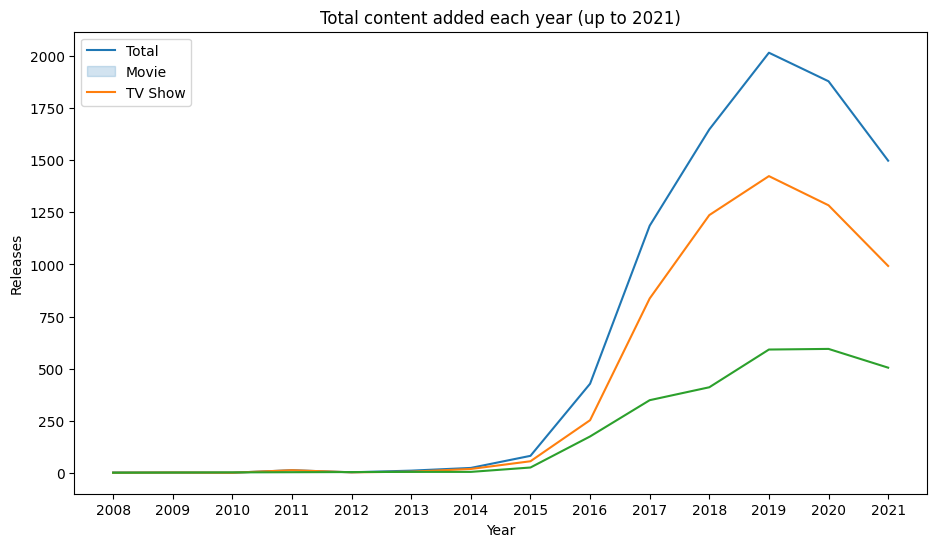

In [ ]:
fig, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2022, 1))
plt.title("Total content added each year (up to 2021)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

In [ ]:
filtered_genres = netflix_titles.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)


In [ ]:
filtered_genres.value_counts().index

Index(['International Movies', 'Dramas', 'Comedies', 'International TV Shows',
       'Documentaries', 'Action & Adventure', 'TV Dramas',
       'Independent Movies', 'Children & Family Movies', 'Romantic Movies',
       'Thrillers', 'TV Comedies', 'Crime TV Shows', 'Kids' TV', 'Docuseries',
       'Music & Musicals', 'Romantic TV Shows', 'Horror Movies',
       'Stand-Up Comedy', 'Reality TV', 'British TV Shows', 'Sci-Fi & Fantasy',
       'Sports Movies', 'Anime Series', 'Spanish-Language TV Shows',
       'TV Action & Adventure', 'Korean TV Shows', 'Classic Movies',
       'LGBTQ Movies', 'TV Mysteries', 'Science & Nature TV',
       'TV Sci-Fi & Fantasy', 'TV Horror', 'Anime Features', 'Cult Movies',
       'Teen TV Shows', 'Faith & Spirituality', 'TV Thrillers', 'Movies',
       'Stand-Up Comedy & Talk Shows', 'Classic & Cult TV', 'TV Shows'],
      dtype='object')

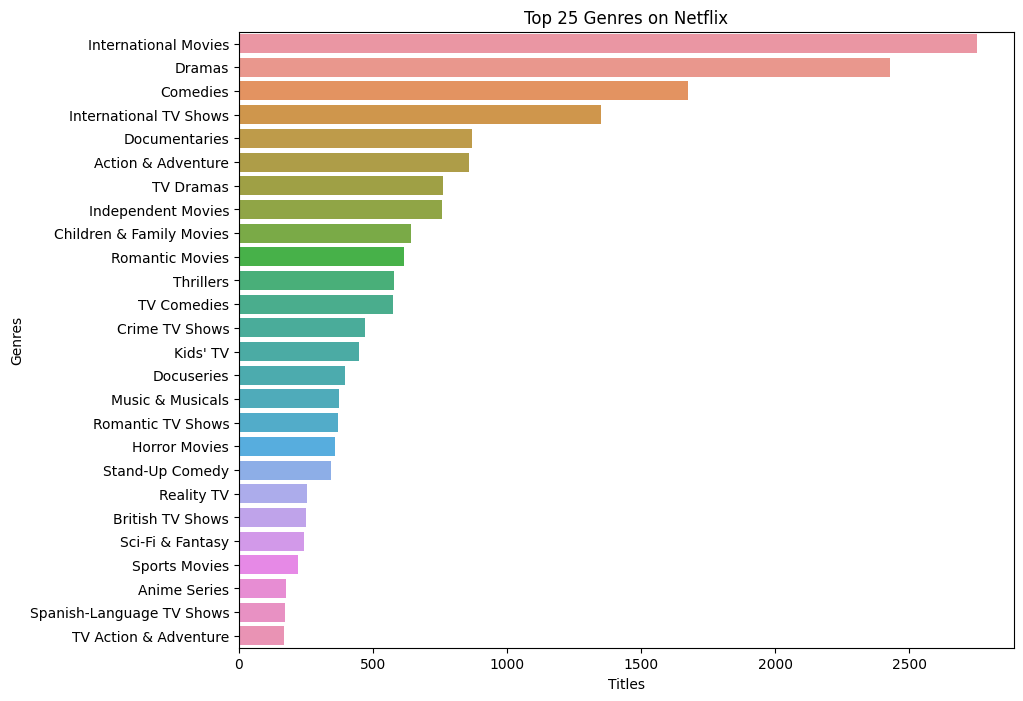

In [ ]:
plt.figure(figsize=(10,8))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:26])
plt.title('Top 25 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/netflix_titles.csv")

In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Text(0.5, 1.0, 'Movies vs Shows Time Series')

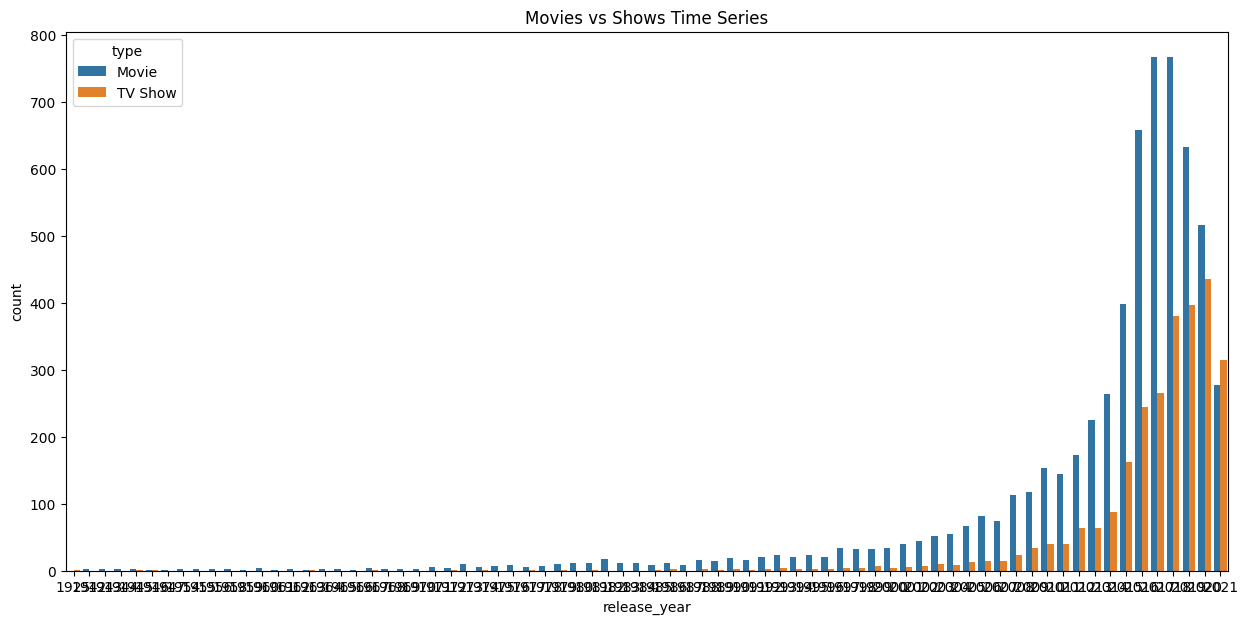

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data = df, x = "release_year",hue = "type" )
plt.title("Movies vs Shows Time Series")

<Axes: xlabel='rating', ylabel='count'>

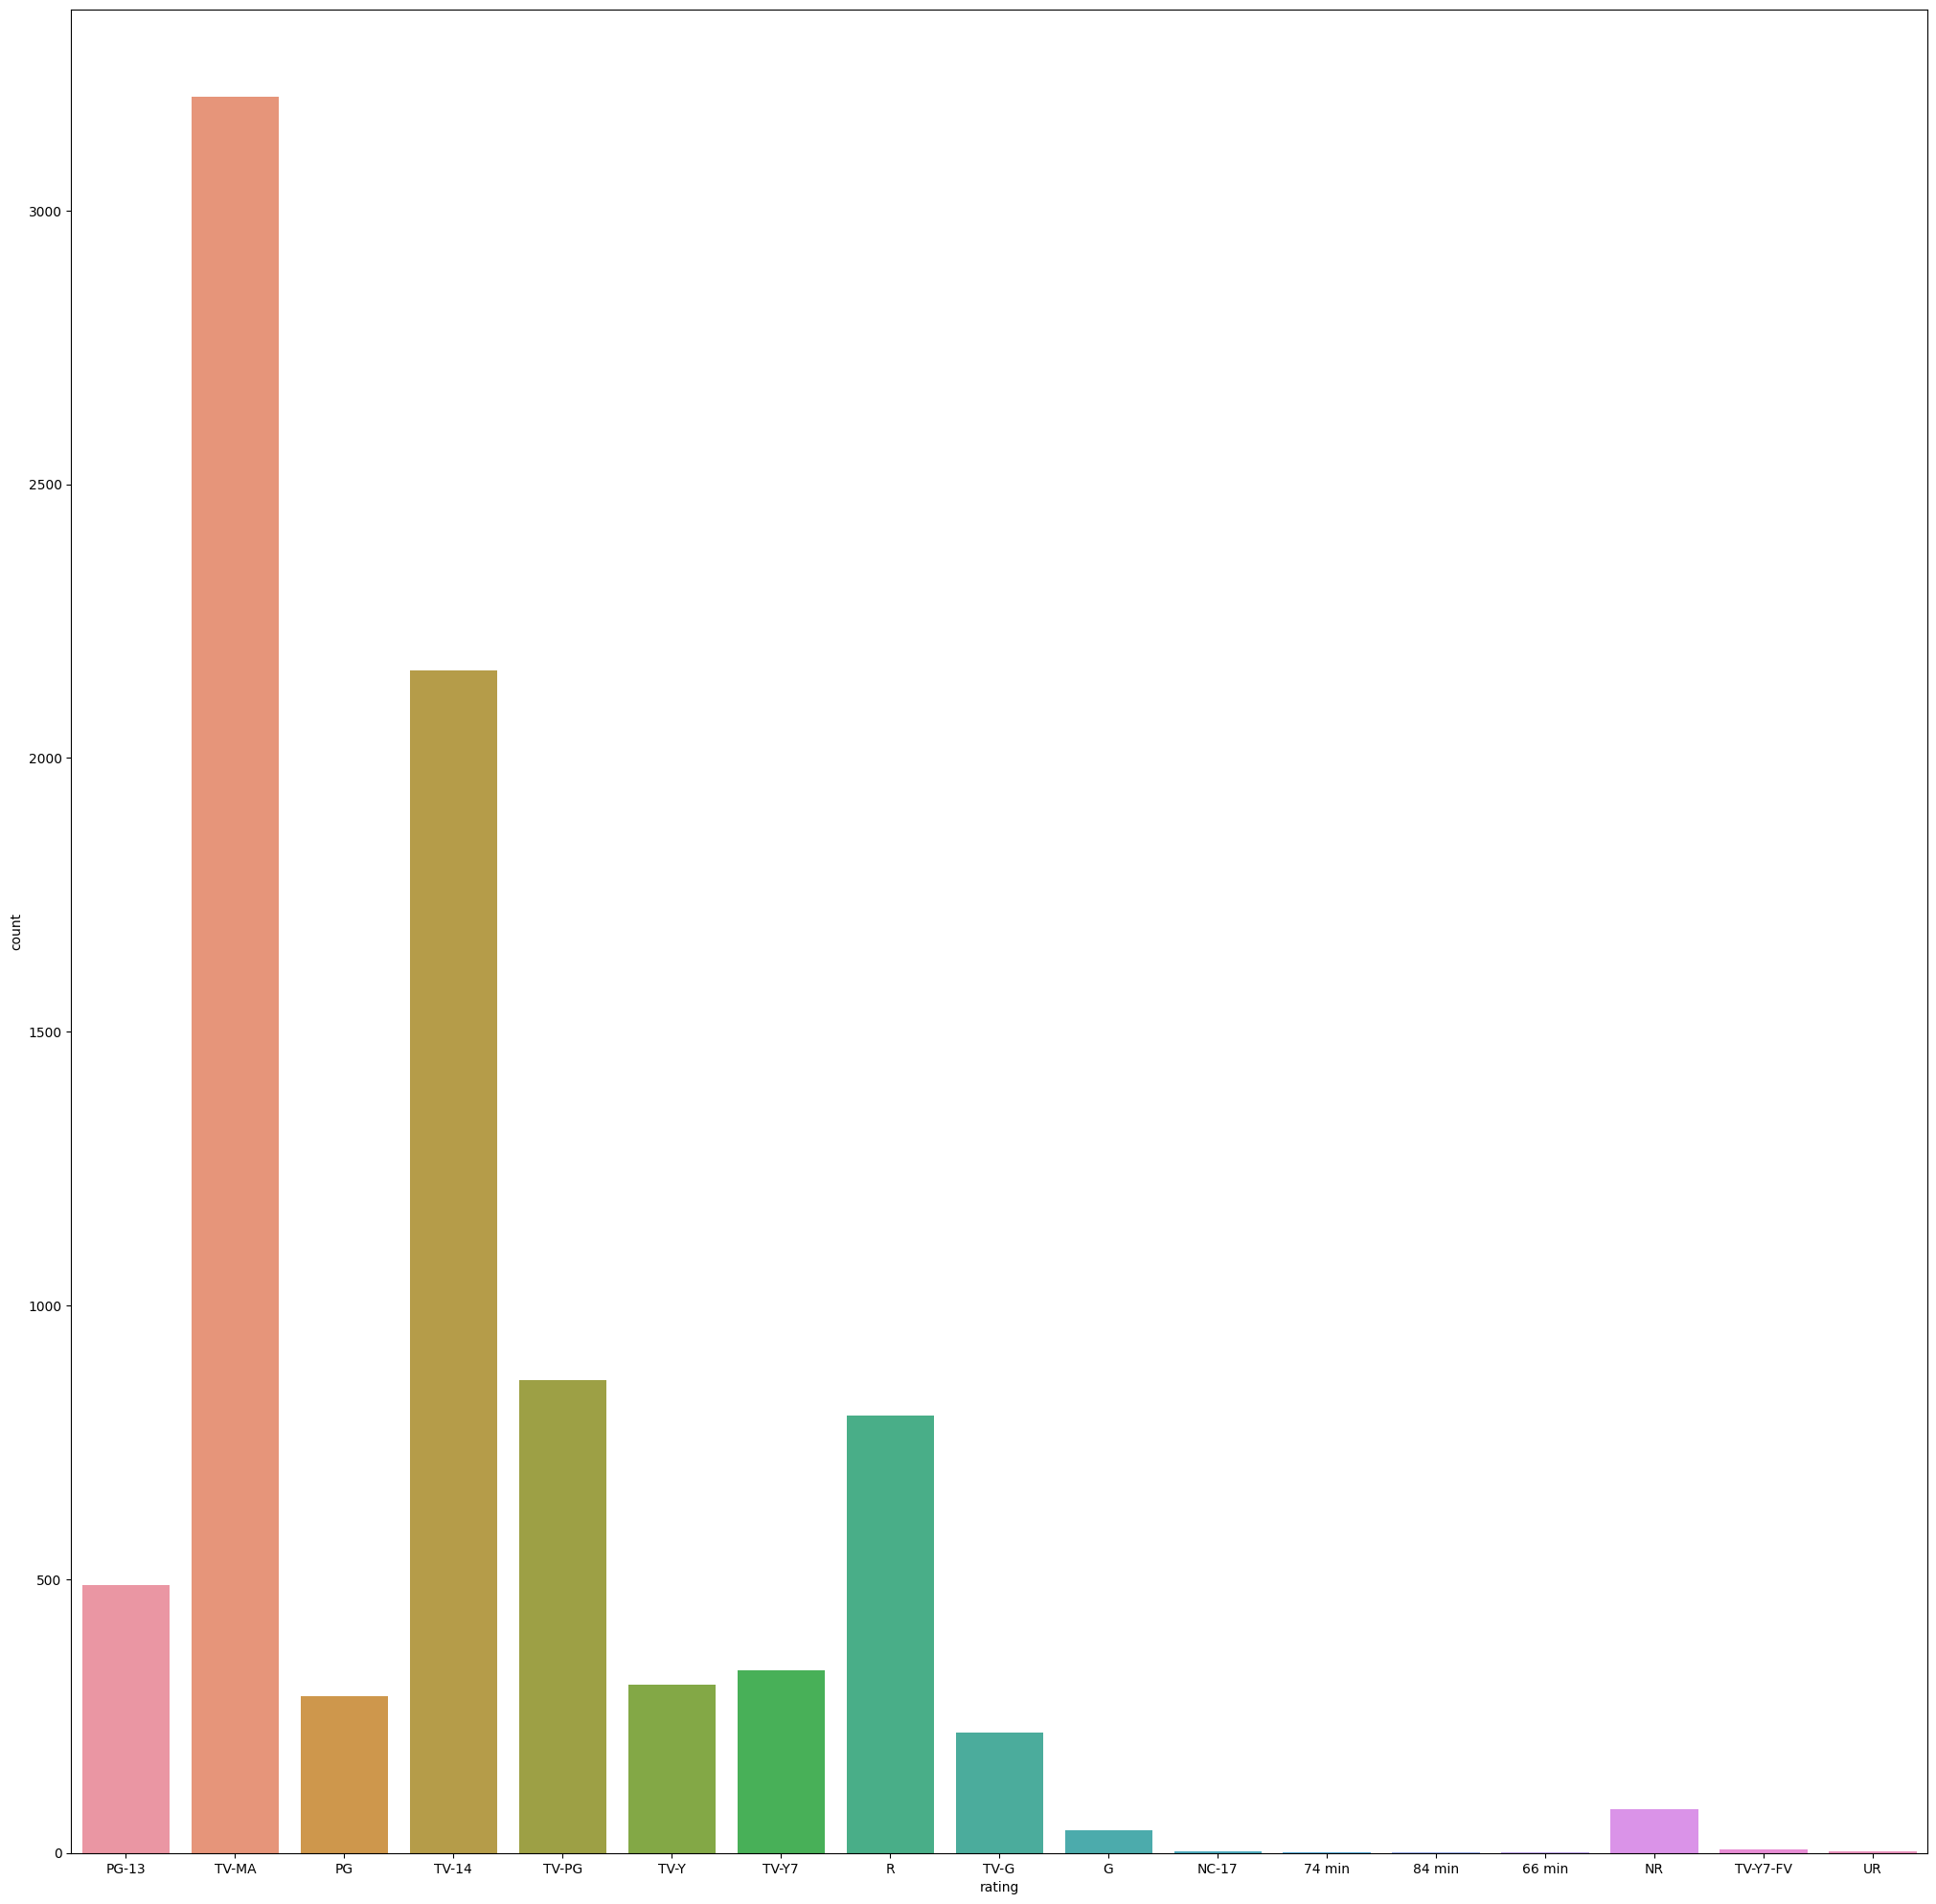

In [ ]:
plt.figure(figsize=(25,25))
sns.countplot(data = df, x = "rating" )

In [ ]:
df = df.drop("date_added",axis=1)
df = df.drop("show_id",axis=1)
df = df.drop("rating",axis=1)
df = df.drop("duration",axis=1)

In [ ]:
def converter(df):
    for i in (df.columns):
        df[i] = df[i].astype(str)
        df[i]= df[i].str.lower()
    return df
converter(df)

,type,title,director,cast,country,release_year,listed_in,description
0,movie,dick johnson is dead,kirsten johnson,nan,united states,2020,documentaries,"as her father nears the end of his life, filmm..."
1,tv show,blood & water,nan,"ama qamata, khosi ngema, gail mabalane, thaban...",south africa,2021,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t..."
2,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",nan,2021,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...
3,tv show,jailbirds new orleans,nan,nan,nan,2021,"docuseries, reality tv","feuds, flirtations and toilet talk go down amo..."
4,tv show,kota factory,nan,"mayur more, jitendra kumar, ranjan raj, alam k...",india,2021,"international tv shows, romantic tv shows, tv ...",in a city of coaching centers known to train i...
...,...,...,...,...,...,...,...,...
8802,movie,zodiac,david fincher,"mark ruffalo, jake gyllenhaal, robert downey j...",united states,2007,"cult movies, dramas, thrillers","a political cartoonist, a crime reporter and a..."
8803,tv show,zombie dumb,nan,nan,nan,2018,"kids' tv, korean tv shows, tv comedies","while living alone in a spooky town, a young g..."
8804,movie,zombieland,ruben fleischer,"jesse eisenberg, woody harrelson, emma stone, ...",united states,2009,"comedies, horror movies",looking to survive in a world taken over by zo...
8805,movie,zoom,peter hewitt,"tim allen, courteney cox, chevy chase, kate ma...",united states,2006,"children & family movies, comedies","dragged from civilian life, a former superhero..."


In [ ]:
df["descriptor"] = ""
def merger(x):
    for i in x.columns:
        df["descriptor"] += df[i]+" "

    return df["descriptor"]
merger(df.drop("title",axis=1))

0       movie kirsten johnson nan united states 2020 d...
1       tv show nan ama qamata, khosi ngema, gail maba...
2       tv show julien leclercq sami bouajila, tracy g...
3       tv show nan nan nan 2021 docuseries, reality t...
4       tv show nan mayur more, jitendra kumar, ranjan...
                              ...                        
8802    movie david fincher mark ruffalo, jake gyllenh...
8803    tv show nan nan nan 2018 kids' tv, korean tv s...
8804    movie ruben fleischer jesse eisenberg, woody h...
8805    movie peter hewitt tim allen, courteney cox, c...
8806    movie mozez singh vicky kaushal, sarah-jane di...
Name: descriptor, Length: 8807, dtype: object

In [ ]:
x = pd.DataFrame(df.title)
x["descriptor"] = df["descriptor"].astype(str)
x.head()

,title,descriptor
0,dick johnson is dead,movie kirsten johnson nan united states 2020 d...
1,blood & water,"tv show nan ama qamata, khosi ngema, gail maba..."
2,ganglands,"tv show julien leclercq sami bouajila, tracy g..."
3,jailbirds new orleans,"tv show nan nan nan 2021 docuseries, reality t..."
4,kota factory,"tv show nan mayur more, jitendra kumar, ranjan..."


In [ ]:
x["descriptor"] = x["descriptor"].str.replace("nan","")
x["descriptor"] = x["descriptor"].str.replace(",","")
x

,title,descriptor
0,dick johnson is dead,movie kirsten johnson united states 2020 docu...
1,blood & water,tv show ama qamata khosi ngema gail mabalane ...
2,ganglands,tv show julien leclercq sami bouajila tracy go...
3,jailbirds new orleans,tv show 2021 docuseries reality tv feuds fl...
4,kota factory,tv show mayur more jitendra kumar ranjan raj ...
...,...,...
8802,zodiac,movie david fincher mark ruffalo jake gyllenha...
8803,zombie dumb,tv show 2018 kids' tv korean tv shows tv co...
8804,zombieland,movie ruben fleischer jesse eisenberg woody ha...
8805,zoom,movie peter hewitt tim allen courteney cox che...


In [ ]:
x["descriptor"]= x["descriptor"].astype(str)
x["descriptor"].dtype

dtype('O')

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
x['tokenized_desc'] = x['descriptor'].apply(lambda x:"".join(x))
x

,title,descriptor,tokenized_desc
0,dick johnson is dead,movie kirsten johnson united states 2020 docu...,movie kirsten johnson united states 2020 docu...
1,blood & water,tv show ama qamata khosi ngema gail mabalane ...,tv show ama qamata khosi ngema gail mabalane ...
2,ganglands,tv show julien leclercq sami bouajila tracy go...,tv show julien leclercq sami bouajila tracy go...
3,jailbirds new orleans,tv show 2021 docuseries reality tv feuds fl...,tv show 2021 docuseries reality tv feuds fl...
4,kota factory,tv show mayur more jitendra kumar ranjan raj ...,tv show mayur more jitendra kumar ranjan raj ...
...,...,...,...
8802,zodiac,movie david fincher mark ruffalo jake gyllenha...,movie david fincher mark ruffalo jake gyllenha...
8803,zombie dumb,tv show 2018 kids' tv korean tv shows tv co...,tv show 2018 kids' tv korean tv shows tv co...
8804,zombieland,movie ruben fleischer jesse eisenberg woody ha...,movie ruben fleischer jesse eisenberg woody ha...
8805,zoom,movie peter hewitt tim allen courteney cox che...,movie peter hewitt tim allen courteney cox che...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, stop_words = "english",token_pattern=r"\b\w+\b")
cv.fit_transform(x["tokenized_desc"])
matrix = cv.fit_transform(x["tokenized_desc"])
x

,title,descriptor,tokenized_desc
0,dick johnson is dead,movie kirsten johnson united states 2020 docu...,movie kirsten johnson united states 2020 docu...
1,blood & water,tv show ama qamata khosi ngema gail mabalane ...,tv show ama qamata khosi ngema gail mabalane ...
2,ganglands,tv show julien leclercq sami bouajila tracy go...,tv show julien leclercq sami bouajila tracy go...
3,jailbirds new orleans,tv show 2021 docuseries reality tv feuds fl...,tv show 2021 docuseries reality tv feuds fl...
4,kota factory,tv show mayur more jitendra kumar ranjan raj ...,tv show mayur more jitendra kumar ranjan raj ...
...,...,...,...
8802,zodiac,movie david fincher mark ruffalo jake gyllenha...,movie david fincher mark ruffalo jake gyllenha...
8803,zombie dumb,tv show 2018 kids' tv korean tv shows tv co...,tv show 2018 kids' tv korean tv shows tv co...
8804,zombieland,movie ruben fleischer jesse eisenberg woody ha...,movie ruben fleischer jesse eisenberg woody ha...
8805,zoom,movie peter hewitt tim allen courteney cox che...,movie peter hewitt tim allen courteney cox che...


In [ ]:
x.index.name = "index"
x

,title,descriptor,tokenized_desc
index,,,
0,dick johnson is dead,movie kirsten johnson united states 2020 docu...,movie kirsten johnson united states 2020 docu...
1,blood & water,tv show ama qamata khosi ngema gail mabalane ...,tv show ama qamata khosi ngema gail mabalane ...
2,ganglands,tv show julien leclercq sami bouajila tracy go...,tv show julien leclercq sami bouajila tracy go...
3,jailbirds new orleans,tv show 2021 docuseries reality tv feuds fl...,tv show 2021 docuseries reality tv feuds fl...
4,kota factory,tv show mayur more jitendra kumar ranjan raj ...,tv show mayur more jitendra kumar ranjan raj ...
...,...,...,...
8802,zodiac,movie david fincher mark ruffalo jake gyllenha...,movie david fincher mark ruffalo jake gyllenha...
8803,zombie dumb,tv show 2018 kids' tv korean tv shows tv co...,tv show 2018 kids' tv korean tv shows tv co...
8804,zombieland,movie ruben fleischer jesse eisenberg woody ha...,movie ruben fleischer jesse eisenberg woody ha...


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(matrix)
matrix

<8807x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 227626 stored elements in Compressed Sparse Row format>

In [ ]:
def index_title(user_movie):
    movie_index =  x[x["title"] == user_movie]["title"].index[0]
    movies_list = sorted(list(enumerate(similarity_matrix[movie_index])), key=lambda x:x[1], reverse=True)[1:6]
    Recommendations = []

    for movie in movies_list:
        Recommendations.append(x.iloc[movie[0]].title)
    return Recommendations

index_title("grown ups")

['hubie halloween',
 'sandy wexler',
 'the wrong missy',
 "you don't mess with the zohan",
 '50 first dates']